In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm

In [2]:
gdp_file = 'C:\\Users\\aanch\\Desktop\\Courses\\Info Viz\\ddf--gapminder--gdp_per_capita_cppp-master\\ddf--datapoints--gdp_per_capita_cppp--by--geo--time.csv'
income_df = pd.read_csv(gdp_file)
income_df.head()

,geo,time,gdp_per_capita_cppp
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [3]:
life_expectancy_file = 'C:\\Users\\aanch\\Desktop\\Courses\\Info Viz\\ddf--gapminder--systema_globalis-master\\ddf--gapminder--systema_globalis-master\\ddf--datapoints--life_expectancy_years--by--geo--time.csv'
life_expectancy_df = pd.read_csv(life_expectancy_file)
life_expectancy_df.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [4]:
child_mortality_file = 'C:\\Users\\aanch\\Desktop\\Courses\\Info Viz\\ddf--gapminder--systema_globalis-master\\ddf--gapminder--systema_globalis-master\\ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv'
child_mortality_df = pd.read_csv(child_mortality_file)
child_mortality_df.head()

,geo,time,child_mortality_0_5_year_olds_dying_per_1000_born
0,abw,1950,109.309
1,abw,1951,105.483
2,abw,1952,98.120
3,abw,1953,91.334
4,abw,1954,85.126


In [5]:
data_income_life = pd.merge(income_df, life_expectancy_df, on=['time', 'geo'])
data_income_life = data_income_life.rename(columns={"gdp_per_capita_cppp": "gdp_per_capita"})
data_income_life.head()

,geo,time,gdp_per_capita,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [7]:
data_income_mortality = pd.merge(income_df, child_mortality_df, on=['time', 'geo'])
data_income_mortality = data_income_mortality.rename(columns={"gdp_per_capita_cppp": "gdp_per_capita",
                                                              "child_mortality_0_5_year_olds_dying_per_1000_born": "child_mortality"})
data_income_mortality.head()

,geo,time,gdp_per_capita,child_mortality
0,afg,1800,603,468.58
1,afg,1801,603,468.58
2,afg,1802,603,468.58
3,afg,1803,603,468.58
4,afg,1804,603,468.58


### Problem 3

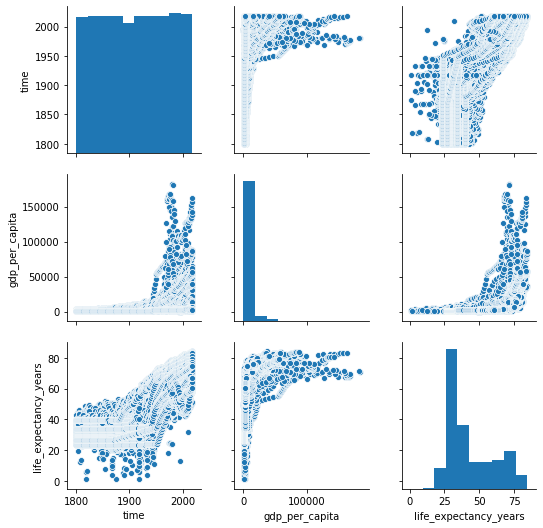

In [8]:
sns.pairplot(data_income_life)

In [9]:
data_income_life = data_income_life.assign(ln_gdp_per_capita = lambda x: np.log(x.gdp_per_capita))
data_income_life.head()

,geo,time,gdp_per_capita,life_expectancy_years,ln_gdp_per_capita
0,afg,1800,603,28.21,6.401917
1,afg,1801,603,28.20,6.401917
2,afg,1802,603,28.19,6.401917
3,afg,1803,603,28.18,6.401917
4,afg,1804,603,28.17,6.401917


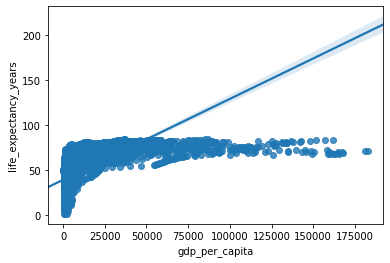

In [15]:
sns.regplot(x="gdp_per_capita", y="life_expectancy_years", data=data_income_life)

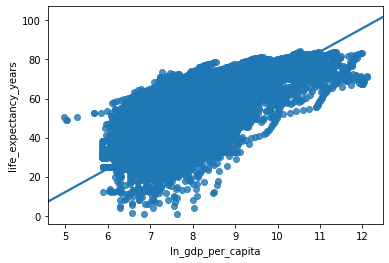

In [16]:
gdp_life_plot = sns.regplot(x="ln_gdp_per_capita", y="life_expectancy_years", data=data_income_life)

In [21]:
X = data_income_life['ln_gdp_per_capita']
X = sm.add_constant(X)
y = data_income_life['life_expectancy_years']

In [23]:
results = sm.OLS(y, X, data=data_income_life).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     life_expectancy_years   R-squared:                       0.681
Model:                               OLS   Adj. R-squared:                  0.681
Method:                    Least Squares   F-statistic:                 8.923e+04
Date:                   Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                           12:53:12   Log-Likelihood:            -1.5223e+05
No. Observations:                  41770   AIC:                         3.045e+05
Df Residuals:                      41768   BIC:                         3.045e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -47.6058      0.308   -154.771      0.000     -48.209     -47.003
ln_gdp_per_capita    11.9615      0.040    298.706      0.000      11.883      12.040
==============================================================================
Omnibus:                      872.933   Durbin-Watson:                   0.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              981.333
Skew:                           0.323   Prob(JB):                    8.06e-214
Kurtosis:                       3.384   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Problem 4

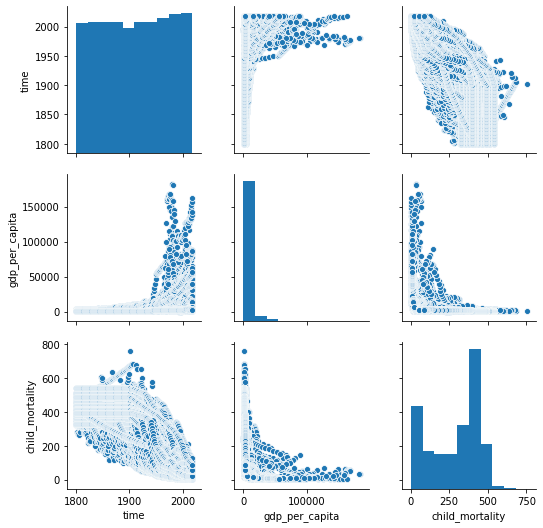

In [24]:
sns.pairplot(data_income_mortality)

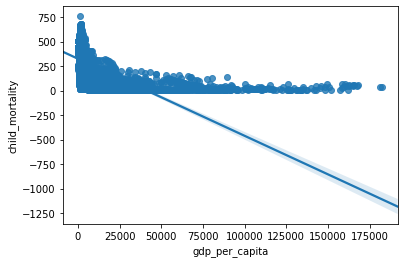

In [30]:
sns.regplot(x="gdp_per_capita", y="child_mortality", data=data_income_mortality)

In [28]:
data_income_mortality = data_income_mortality.assign(ln_gdp_per_capita = lambda x: np.log(x.gdp_per_capita))
data_income_mortality.head()

,geo,time,gdp_per_capita,child_mortality,ln_gdp_per_capita
0,afg,1800,603,468.58,6.401917
1,afg,1801,603,468.58,6.401917
2,afg,1802,603,468.58,6.401917
3,afg,1803,603,468.58,6.401917
4,afg,1804,603,468.58,6.401917


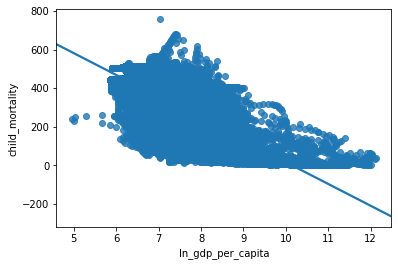

In [31]:
sns.regplot(x="ln_gdp_per_capita", y="child_mortality", data=data_income_mortality)

In [29]:
data_income_mortality = data_income_mortality.assign(ln_child_mortality = lambda x: np.log(x.child_mortality))
data_income_mortality.head()

,geo,time,gdp_per_capita,child_mortality,ln_gdp_per_capita,ln_child_mortality
0,afg,1800,603,468.58,6.401917,6.149707
1,afg,1801,603,468.58,6.401917,6.149707
2,afg,1802,603,468.58,6.401917,6.149707
3,afg,1803,603,468.58,6.401917,6.149707
4,afg,1804,603,468.58,6.401917,6.149707


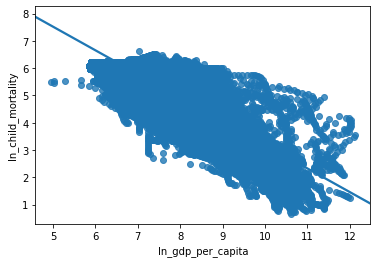

In [33]:
sns.regplot(x="ln_gdp_per_capita", y="ln_child_mortality", data=data_income_mortality)

In [35]:
X = data_income_mortality['ln_gdp_per_capita']
X = sm.add_constant(X)
y = data_income_mortality['ln_child_mortality']

In [36]:
results = sm.OLS(y, X, data=data_income_mortality).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_child_mortality   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                 9.926e+04
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:02:42   Log-Likelihood:                -39352.
No. Observations:               40915   AIC:                         7.871e+04
Df Residuals:                   40913   BIC:                         7.873e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.8520      0.021    560.615      0.000      11.811      11.893
ln_gdp_per_capita    -0.8660      0.003   -315.063      0.000      -0.871      -0.861
==============================================================================
Omnibus:                      645.267   Durbin-Watson:                   0.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              939.904
Skew:                          -0.186   Prob(JB):                    7.99e-205
Kurtosis:                       3.642   Cond. No.                         52.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""